In [1]:
import pandas as pd

# Read x_train.txt
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None)

# Read y_train.txt
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None)


# Display the data
print("x:")
print(X.head())

print("\ny:")
print(y.head())


x:
        0         1         2         3         4         5         6    \
0 -2.619773 -2.619533 -1.199350 -1.083335 -1.000910 -0.366967 -2.164037   
1 -1.415579 -1.782544 -2.880270 -1.958863  1.159968  0.273030 -1.628728   
2 -2.745092 -1.382945 -1.626015 -1.282560 -0.663146  0.052349 -2.403322   
3  0.618998  0.455364 -0.115081  0.649040 -0.862207  2.308504  0.526114   
4 -0.070694 -0.550509 -0.565556 -0.693065 -0.573089 -0.395862  0.003170   

        7         8         9    ...        490        491        492  \
0 -1.210001 -0.658311 -1.489539  ...  10.849925  10.343346  10.717519   
1 -0.175813 -0.916857 -0.570166  ...  11.489417   5.195818   3.494627   
2 -0.765073 -0.394354 -0.806624  ...  13.934934   9.267515   4.705604   
3 -1.094852  1.088656 -0.481210  ...  12.021328   3.852231  11.059702   
4 -0.981609 -0.505775 -0.758430  ...   7.537788  11.229665  11.318915   

        493        494        495        496        497        498        499  
0  7.709295   5.894554  12.

In [2]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
from xgboost import XGBClassifier

In [8]:
idc1=[100,102,103,104,105,101]
idc2=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
import numpy as np
rarr=[]
linspace_array = np.linspace(0.6, 0.8, num=20)
for j in range(len(idc2)+1):
    if j == len(idc2):
        X1 = X.iloc[:, idc1]
        print(idc1)
    else:
        X1 = X.iloc[:, idc1+[idc2[j]]]
        print(idc1+[idc2[j]])
    for i in linspace_array:
        #if i % 10 == 0:
        #print(i)
        for _ in range(40):
            X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=1 - i)
            model1 = XGBClassifier(device="cuda")
            model1.fit(X1_train, y1_train)
            y1_pred = model1.predict(X1_test)
            accuracy = accuracy_score(y1_test.to_numpy(), y1_pred)
            name = 'baseline'
            if j != len(idc2):
                name = str(idc2[j])
            rarr.append({'i': i, 'extra': name, 'accuracy': accuracy})
resdf = pd.DataFrame(rarr, columns=['i', 'extra', 'accuracy'])

[100, 102, 103, 104, 105, 101, 0]
[100, 102, 103, 104, 105, 101, 1]
[100, 102, 103, 104, 105, 101, 2]
[100, 102, 103, 104, 105, 101, 3]
[100, 102, 103, 104, 105, 101, 4]
[100, 102, 103, 104, 105, 101, 5]
[100, 102, 103, 104, 105, 101, 6]
[100, 102, 103, 104, 105, 101, 7]
[100, 102, 103, 104, 105, 101, 8]
[100, 102, 103, 104, 105, 101, 9]
[100, 102, 103, 104, 105, 101]


In [11]:
resdf

,i,extra,accuracy
0,0.6,0,0.6755
1,0.6,0,0.6495
2,0.6,0,0.6600
3,0.6,0,0.6620
4,0.6,0,0.6645
...,...,...,...
8795,0.8,baseline,0.6370
8796,0.8,baseline,0.6690
8797,0.8,baseline,0.6520
8798,0.8,baseline,0.6680


In [14]:
resdf_melted1 = pd.melt(resdf, id_vars='extra', value_vars=['accuracy'], var_name='accuracy_type', value_name='accuracy_value')
resdf_melted1

,extra,accuracy_type,accuracy_value
0,0,accuracy,0.6755
1,0,accuracy,0.6495
2,0,accuracy,0.6600
3,0,accuracy,0.6620
4,0,accuracy,0.6645
...,...,...,...
8795,baseline,accuracy,0.6370
8796,baseline,accuracy,0.6690
8797,baseline,accuracy,0.6520
8798,baseline,accuracy,0.6680


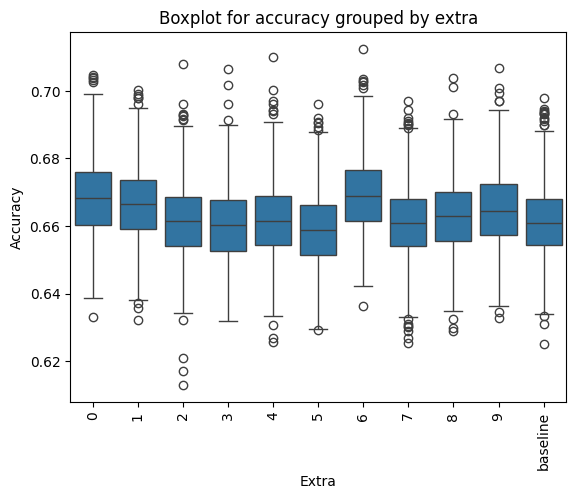

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for accuracy grouped by 'extra'
sns.boxplot(x='extra', y='accuracy', data=resdf)

# Set the title and labels
plt.title('Boxplot for accuracy grouped by extra')
plt.xlabel('Extra')
plt.ylabel('Accuracy')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [18]:
resdf.to_csv('resdf.csv', index=False)